In [11]:
import numpy as np
import os
import shutil

In [78]:
# orig_file = "/scratch/sbanerj/trans-eqtl/input/gtex/expression/gtex_protein_coding_normalized_lmcorrected_withage_ms.txt"
# orig_file = "/scratch/sbanerj/trans-eqtl/input/gtex/preprocess_gx/normalized/ms_normalized.txt"
# orig_file = "/scratch/sbanerj/trans-eqtl/input/gtex/expression/gtex_protein_coding_normalized_ms.txt"
orig_file = "/scratch/sbanerj/trans-eqtl/input/gtex/expression/gtex_protein_coding_normalized_5peer_ms.txt"
# orig_file = "/scratch/sbanerj/trans-eqtl/input/gtex/expression/gtex_protein_coding_normalized_lmcorrected_withgtPC_ms.txt"
# orig_file = "/scratch/sbanerj/trans-eqtl/input/gtex/expression/gtex_protein_coding_normalized_lmcorrected_gender_platform_ms.txt"

In [79]:
gx = np.zeros((15158, 361))
i = 0
with open(orig_file, 'r') as instream:
    header_orig = next(instream)
    for line in instream:
        linesplit = line.strip().split()
        gx[i, :] = np.array([float(x) for x in linesplit[1:]])
        i += 1

In [ ]:
# for sim in range(5):
#     simdir = "/scratch/sbanerj/trans-eqtl/simulation/15158_361_20_800_30_150_100_0.01_0.0_0.0_1.0_0.6_4.0_0.1_20_0.02/sim{:03d}/input".format(sim)
    
#     sim_file = os.path.join(simdir, "expression.txt")
#     backup_file = os.path.join(simdir, "expression.txt_backup")
#     gene_names = list()
#     with open(sim_file, 'r') as instream:
#         header_sim  = next(instream)
#         for line in instream:
#             linesplit = line.strip().split()
#             gene_names.append(linesplit[0])
            
#     shutil.copyfile(sim_file, backup_file)
#     target_file = sim_file

#     with open(target_file, 'w') as fout:
#         fout.write(header_sim)
#         for i in range(gx.shape[0]):
#             line = '{:s}\t'.format(gene_names[i]) + '\t'.join(['{:g}'.format(x) for x in gx[i, :]]) + '\n'
#             fout.write(line)

In [19]:
Rcorr = np.corrcoef(gx)

ntarget = 4000
nselect = list()
remaining = [x for x in range(15158)]

itr = 0
for i in range(ntarget):
    selected = False
    while not selected:
        itr += 1
        if len(nselect) == 0:
            idx = np.random.choice(remaining)
            nselect.append(idx)
            remaining.pop(idx)
            selected = True
        else:
            idx = np.random.choice(remaining)
            Rlist = Rcorr[idx, np.array(nselect)]
            if np.max(np.abs(Rlist)) < 0.5:
                nselect.append(idx)
                ridx = remaining.index(idx)
                remaining.pop(ridx)
                selected = True

nselect = np.sort(np.array(nselect))
print("Required {:d} iterations".format(itr))

Required 14834 iterations


In [80]:
nselect = np.sort(np.random.choice(15158, 4000, replace = False))
print(nselect)

for sim in range(5):
    simdir = "/scratch/sbanerj/trans-eqtl/simulation/15158_361_20_800_30_150_100_0.01_0.0_0.0_1.0_0.6_4.0_0.1_20_0.02/sim{:03d}/input".format(sim)
    
    sim_file = os.path.join(simdir, "expression.txt_backup")
    backup_file = os.path.join(simdir, "expression_ms.txt")
    gene_names = list()
    with open(sim_file, 'r') as instream:
        header_sim  = next(instream)
        for line in instream:
            linesplit = line.strip().split()
            gene_names.append(linesplit[0])

    if not os.path.exists(backup_file):
        shutil.copyfile(sim_file, backup_file)

    target_file = os.path.join(simdir, "expression.txt")

    with open(target_file, 'w') as fout:
        fout.write(header_sim)
        for i in nselect:
            line = '{:s}\t'.format(gene_names[i]) + '\t'.join(['{:g}'.format(x) for x in gx[i, :]]) + '\n'
            fout.write(line)

[    0     1     4 ... 15153 15156 15157]


In [21]:
for sim in range(5):
    simdir = "/scratch/sbanerj/trans-eqtl/simulation/15158_361_20_800_30_150_100_0.01_0.0_0.0_1.0_0.6_4.0_0.1_20_0.02/sim{:03d}/tejaas/permnull_sb0.05/".format(sim)
    rrfile = os.path.join(simdir, "rr.txt")
    bkfile = os.path.join(simdir, "rr_orig_gx.txt")
    if not os.path.exists(bkfile):
        print("Copying for {:d}".format(sim))
        shutil.copyfile(rrfile, bkfile)

In [81]:
#data = np.corrcoef(gx)
data = np.abs(np.corrcoef(gx.T))

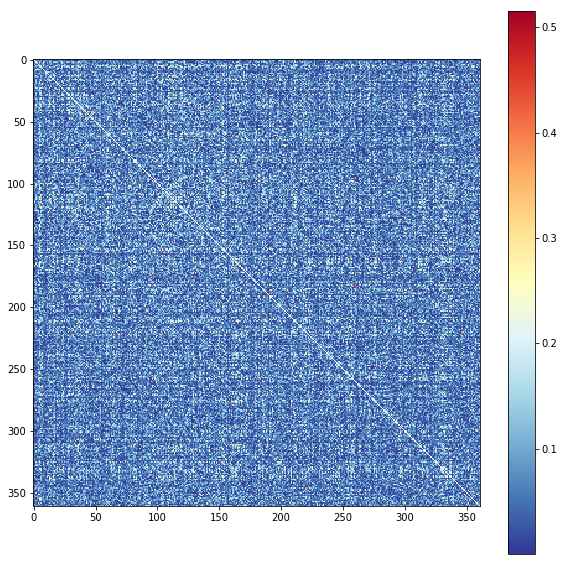

In [82]:
# mask = np.diag(np.ones(nselect.shape[0]))
mask = np.diag(np.ones(361))
masked_data = np.ma.masked_array(data, mask)

import matplotlib.pyplot as plt
import matplotlib
import numpy as np

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)

cmap = matplotlib.cm.get_cmap('RdYlBu_r')
cmap.set_bad('w')

im = ax1.imshow(masked_data, cmap=cmap, interpolation='nearest')
plt.colorbar(im)
plt.show()

In [26]:
M = gx.T.copy()

In [28]:
U, s, Vt = np.linalg.svd(M, full_matrices=False)
V = Vt.T

In [30]:
S = np.diag(s)
Mhat = np.dot(U, np.dot(S, V.T))
print ("Using all PCs, MSE = %.6G" %(np.mean((M - Mhat)**2)))

Using all PCs, MSE = 2.15945E-29


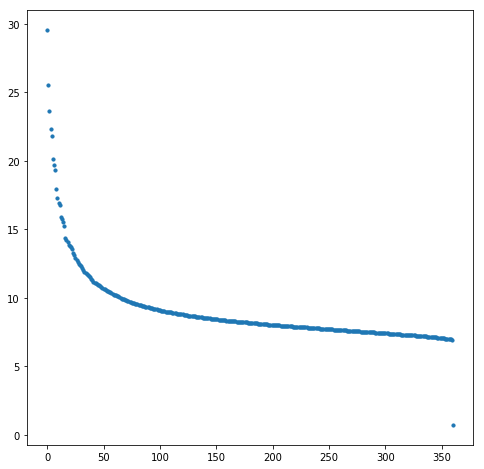

In [48]:
fig = plt.figure(figsize = (8, 8))
ax1 = fig.add_subplot(111)
ax1.scatter(range(s.shape[0]), np.sqrt(s), s = 10)
# ax1.set_xlim([0, 50])
plt.show()

In [50]:
pc = np.sqrt(s[:20]) * V[:, :20]
pc.shape

(15158, 20)

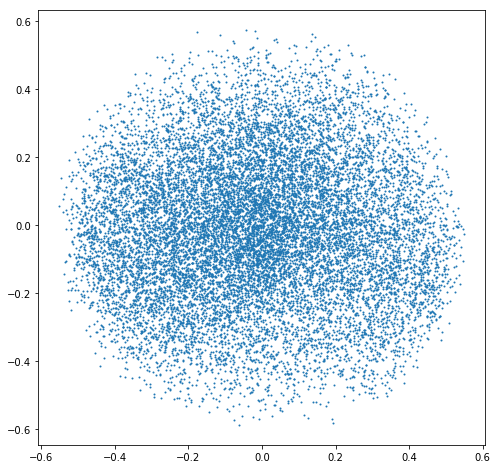

In [63]:
fig = plt.figure(figsize = (8, 8))
ax1 = fig.add_subplot(111)
ax1.scatter(pc[:,0], pc[:,1], s = 1)
# ax1.set_xlim([0, 50])
plt.show()

In [75]:
s[1]**(1./2) * V[:,1]

array([ 0.12998702,  0.01102402,  0.17954934, ...,  0.32508305,
       -0.04720112,  0.15272019])

In [77]:
pc[:, 1]

array([ 0.12998702,  0.01102402,  0.17954934, ...,  0.32508305,
       -0.04720112,  0.15272019])

Using first 20 PCs, MSE = 0.389531


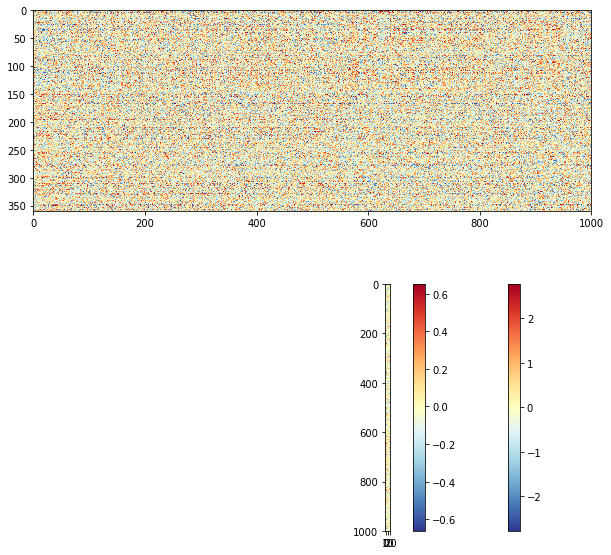

In [72]:
Mhat2 = np.dot(U[:, :20], np.dot(S[:20, :20], V[:,:20].T))
print ("Using first 20 PCs, MSE = %.6G" %(np.mean((M - Mhat2)**2)))

n_pc = 20


# fig, [ax1, ax2, ax3] = plt.subplots(1, 3)
# ax1.imshow(M)
# ax1.set_title('true image')
# #ax2.imshow(noisy.mean(0))
# #ax2.set_title('mean of noisy images')
# #ax3.imshow((s**(1./2) * V[:,0]).reshape(M.shape))
# #ax3.set_title('first spatial PC')

fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

cmap = matplotlib.cm.get_cmap('RdYlBu_r')
cmap.set_bad('w')

im1 = ax1.imshow(M[:, :1000], cmap=cmap, interpolation='nearest')
im2 = ax2.imshow(pc[:1000, :], cmap = cmap, interpolation='nearest')
plt.colorbar(im1)
plt.colorbar(im2)

plt.show()

In [74]:
pc.shape

(15158, 20)

In [ ]:
covgx = np.load("/scratch/sbanerj/trans-eqtl/input/gtex/expression.old/gtex_correlation.npy")
covgx2 = np.abs(covgx)

In [ ]:
np.random.choice(15158)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)

data = covgx


cmap = matplotlib.cm.get_cmap('RdYlBu_r')
cmap.set_bad('w')

im = ax1.imshow(covgx[:12000, :][:, :12000], cmap=cmap, interpolation='nearest')
plt.colorbar(im)
plt.show()

In [ ]:
np.sort(np.random.choice(15158, 10, replace=False))